In [1]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv

In [2]:
df = pd.read_pickle("Dataset/Tweets.pkl")
#df = pd.read_csv('Dataset\Tweets.csv', encoding='latin-1')

In [3]:
df = df.astype(str)

In [4]:
df

,Tweets,Emotion,Writer
0,iâm proud to endorse this diverse and hopefu...,Positive,BarackObama
1,welcome home astrobehnken and astrodoug we lau...,Positive,BarackObama
2,this pandemic is far from overââand our me...,Trust,BarackObama
3,john believed that in all of us there exists t...,Positive,BarackObama
4,john spent his entire life fighting for justic...,Neagtive,BarackObama
...,...,...,...
12104,for a minute there i was all happy thinking it...,Anticipation,Random
12105,for the first time ever my iphone crashed itun...,Neagtive,Random
12106,for trish sa right side ng reply ko may star a...,Positive,Random
12107,forgot about them science exams tbh n,Neutral,Random


In [5]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [6]:
my_tags = ['BarackObama', 'BillGates', 'HillaryClinton', 'BorisJohnson', 'JeremyCorbyn','Random']


In [7]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['Tweets'] = df['Tweets'].apply(clean_text)

In [8]:
df['Tweets'].apply(lambda x: len(x.split(' '))).sum()

120471

In [9]:
X= df[['Tweets', 'Emotion']].agg('-'.join, axis=1)
y=df['Writer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)


score = accuracy_score(y_pred, y_test)
print("accuracy:   %0.2f" % score)
print(classification_report(y_test, y_pred,target_names=my_tags))




accuracy:   0.82
                precision    recall  f1-score   support

   BarackObama       0.81      0.83      0.82       606
     BillGates       0.78      0.89      0.83       605
HillaryClinton       0.81      0.90      0.85       592
  BorisJohnson       0.81      0.70      0.75       615
  JeremyCorbyn       0.86      0.77      0.81       628
        Random       0.87      0.84      0.86       587

      accuracy                           0.82      3633
     macro avg       0.82      0.82      0.82      3633
  weighted avg       0.82      0.82      0.82      3633



In [11]:
accuracy=float(score)
print (accuracy)

0.8213597577759427


In [12]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')

C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [13]:
from sklearn.metrics import recall_score

recall=recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')

In [14]:
dict = {
  "Accuracy": accuracy,
  "Precision": precision,
  "Recall": recall
}

In [15]:
import pickle

file = open('Accuracies/NB', 'wb')
pickle.dump(dict, file)
file.close()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

                precision    recall  f1-score   support

   BarackObama       0.83      0.81      0.82       627
     BillGates       0.89      0.78      0.83       692
  BorisJohnson       0.90      0.81      0.85       658
HillaryClinton       0.70      0.81      0.75       529
  JeremyCorbyn       0.77      0.86      0.81       558
        Random       0.84      0.87      0.86       569

      accuracy                           0.82      3633
     macro avg       0.82      0.82      0.82      3633
  weighted avg       0.83      0.82      0.82      3633



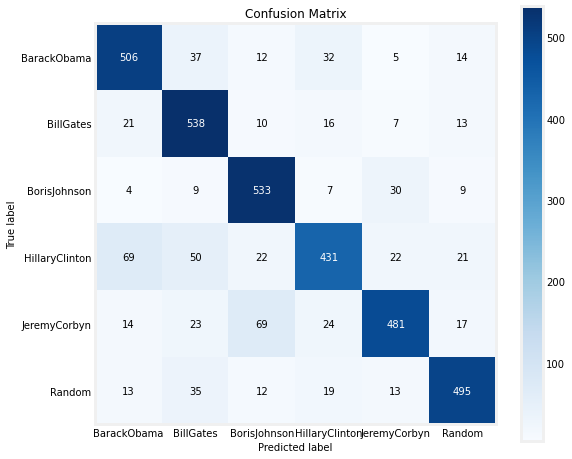

In [17]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))